In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns

#폰트 지정
import matplotlib.font_manager as fm
font_name=fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc('font', family=font_name)

mpl.rcParams["axes.unicode_minus"] = False

from sklearn.model_selection import train_test_split
import mglearn

## 선형 회귀 모델 
    - 회쉬계수(가중치)를 구하는 것이 중요하다.(y=ax+b 에서 a) 
    - 머신런닝이 스스로 a를 찾아나간다.(머신러닝에서는 a대신 w)
    - 다중선형회귀 : y=w1x1 +w2x2 + w3x3 +...+b 똑같이 적용할 수 있는 가중치를 찾아야 한다. 
    
    + hypothesis : y = w[0]*x[0]+ w[1]*x[1]+....+b

w[0]: 0.393906  b: -0.031804


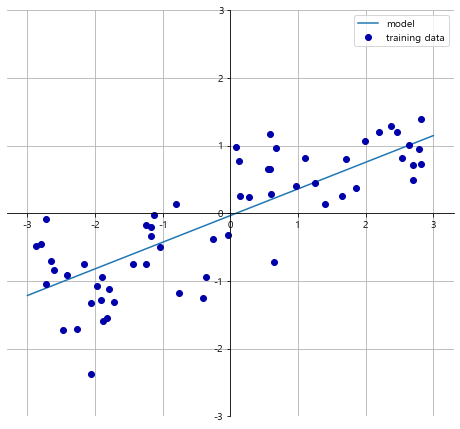

In [4]:
mglearn.plots.plot_linear_regression_wave()

In [5]:
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
lr = LinearRegression() #선형회귀는 별도의 튜닝을 할 수 없다. 값만 입력해주면 끝 
lr.fit(X_train, y_train)

LinearRegression()

In [10]:
print("훈련 점수 :", lr.score(X_train, y_train))
print("테스트 점수 :", lr.score(X_test, y_test))

dir(lr)
print("기울기 : {}, 절편 : {}".format(lr.coef_, lr.intercept_))

훈련 점수 : 0.6700890315075756
테스트 점수 : 0.65933685968637
기울기 : [0.39390555], 절편 : -0.031804343026759746


In [13]:
# 주제 : 전기 생산량과 소비량 
# 귀무가설 : 전기생산량과 소비량의 상관관계가 없다.
# 대립가설 : 전기생산량과 소비량의 상관관계가 있다. 

# 월별 전기 사용량(백만kwh)
y = [2.48, 2.27, 2.47, 2.77, 2.98, 3.05, 3.18, 3.46, 3.03, 3.25, 2.67, 2.53]
    
# 월별 전기 생산금액(억원)
X = [3.52, 2.58, 3.31, 4.07, 4.62, 3.98, 4.29, 4.83, 3.71, 4.61, 3.90, 3.20]

# 생산량 4일때 사용량은 얼마인가? 

In [16]:
# 관계가 있는지 먼저 파악해야한다. 
from scipy import stats

result = stats.linregress(X, y)
result

LinregressResult(slope=0.4956032360182905, intercept=0.9195814280689418, rvalue=0.8929235125385305, pvalue=9.238421943157891e-05, stderr=0.07901935226531728)

In [20]:
slope, intercept, rv, pv, stderr = stats.linregress(X,y)
print(slope, intercept)

0.4956032360182905 0.9195814280689418


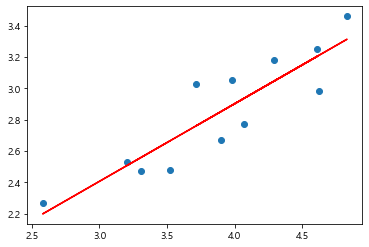

In [23]:
plt.scatter(X,y)
plt.plot(np.array(X), slope*np.array(X)+intercept, c="red")

In [25]:
result = slope*4 + intercept
print("결과 :",result)

결과 : 2.901994372142104


In [33]:
# 머신러닝 알고리즘 사용
# 2차원 배열로 바꿔줘야한다.
num = np.array(X)
num = num.reshape(-1, 1)

lr2= LinearRegression()
lr2.fit(num, y)
print(lr2.coef_,",",lr2.intercept_)

lr2.predict([[4]])
lr2.predict([[4],[5]])

[0.49560324] , 0.919581428068942


array([2.90199437, 3.39759761])

#### 고차원 특성에 대한 과적합

- 다중선형회귀 : 입력값이 많아지면 과적합이 나타날 수 있음 -> 이것을 해결하는게 중요

In [70]:
#컬럼이 많을수록 과적합의 위험성이 커진다.
from mglearn.datasets import load_boston, load_extended_boston

X, y = load_extended_boston()
print(X.shape) 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) 
lr = LinearRegression().fit(X_train, y_train)

print("훈련 점수 :", lr.score(X_train, y_train))
print("테스트 점수 :", lr.score(X_test, y_test))

(506, 104)
훈련 점수 : 0.9520519609032729
테스트 점수 : 0.607472195966585


### 릿지(Ridge) 회귀 모델 
    + L2 norm 방식으로 규제(정규화 : Regularization)
    + MSE항에 Penalty항 추가 
    + 알파를 크게 하면 패널티의 효과가 커지고(가중치가 감소), 작게하면 그 반대가 된다.
    + 알파 : 하이퍼파라미터
    + 0이 되지 않는다. 
    + 모델을 단순하게 해주고 훈련셋에 대한 성능 차이를 절충하는 효과



In [48]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train) #alpha=1.0이 기본값 
print("훈련 점수 :", ridge.score(X_train, y_train))
print("테스트 점수 :", ridge.score(X_test, y_test))

훈련 점수 : 0.885796658517094
테스트 점수 : 0.7527683481744754


In [49]:
ridge10 = Ridge(alpha=10.0).fit(X_train, y_train) 
print("훈련 점수 :", ridge10.score(X_train, y_train))
print("테스트 점수 :", ridge10.score(X_test, y_test))
#알파값이 커질수록 모델이 더 단순해진다. => 규제를 강하게 한다. => 과대적합을 감소시킨다.(일반화에 가까워진다.)

훈련 점수 : 0.7882787115369615
테스트 점수 : 0.6359411489177311


In [52]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train) 
print("훈련 점수 :", ridge01.score(X_train, y_train))
print("테스트 점수 :", ridge01.score(X_test, y_test))

훈련 점수 : 0.9282273685001986
테스트 점수 : 0.772206793647982


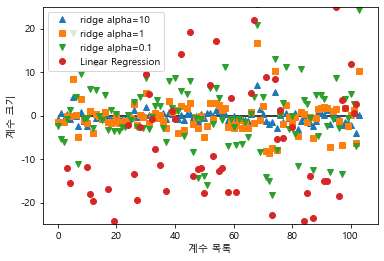

In [62]:
plt.plot(ridge10.coef_, '^', label="ridge alpha=10")
plt.plot(ridge.coef_, 's', label="ridge alpha=1") # W값이 더 커진다.
plt.plot(ridge01.coef_, 'v', label="ridge alpha=0.1")  # 알파가 감소할수록 가중치는 더 커진다
plt.plot(lr.coef_, 'o', label="Linear Regression")


plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
plt.hlines(0,0,len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

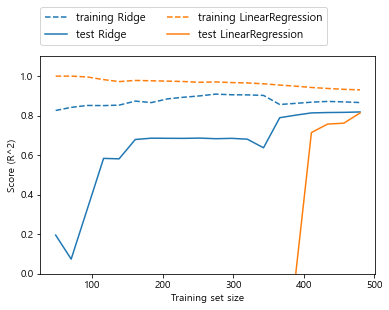

In [67]:
#알파값을 1로 고정한 상태에서 데이터의 크기 조절
mglearn.plots.plot_ridge_n_samples()



### 라쏘(Lasso) 회귀 모델
    + L1 norm 방식으로 규제
    + 알파 : 하이퍼파라미터
    + 절대값의 합 
    + 알파값을 크게하면 규제가 커지고 단순해지고, 작게하면 규제가 작아지고 복잡해지는 것은 릿지회귀와 똑같다.
    + 알파를 크게하면 패널티의 효과가 커지고 작게하면 그 반대가 된다. 
    + 가중치를 0으로 만들 수 있다.
    + 특성 선택이 자동으로 이루어진다(꼭 필요한 특성만 남기고 필요없는 특성은 버릴 수 있다.) 
   

In [68]:
from sklearn.linear_model import Lasso

In [71]:
lasso = Lasso().fit(X_train, y_train) # alpha=1.0이 기본값
print("훈련 점수 :", lasso.score(X_train, y_train))
print("테스트 점수 :", lasso.score(X_test, y_test))
print("사용한 특성의 수 :", np.sum(lasso.coef_ != 0))

훈련 점수 : 0.29323768991114607
테스트 점수 : 0.20937503255272294
사용한 특성의 수 : 4


In [73]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train) # max_iter 최대 반복수
print("훈련 점수 :", lasso001.score(X_train, y_train))
print("테스트 점수 :", lasso001.score(X_test, y_test))
print("사용한 특성의 수 :", np.sum(lasso001.coef_ != 0))

훈련 점수 : 0.8962226511086497
테스트 점수 : 0.7656571174549983
사용한 특성의 수 : 33


In [74]:
# w 가 가장 오차가 적은값이 가장 좋은 값을 찾아나가는 방법: 경사하강법
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train) # max_iter 최대 반복수
print("훈련 점수 :", lasso00001.score(X_train, y_train))
print("테스트 점수 :", lasso00001.score(X_test, y_test))
print("사용한 특성의 수 :", np.sum(lasso00001.coef_ != 0))

훈련 점수 : 0.9507158754515467
테스트 점수 : 0.6437467421272709
사용한 특성의 수 : 96


### ElasticNet(엘라스틱넷)
- Ridge + Lasso

---
###  Boston Sample을 이용한 다중 선형 회귀 


In [128]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)
print(boston.feature_names)  #pasted Image 참고
print(boston.target)

(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 

![Pasted Image 2021-01-08 14-40-57.png](C:/p/pythonwork/)

In [78]:
# MEDV 가 종속변수 

# 훈련용 테스트용은 생략하고 진행
model_boston = LinearRegression().fit(boston.data, boston.target)

In [79]:
model_boston.coef_ #특성 13개에 대한 가중치 

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

Text(0.5, 1.0, '집값 예측치와 실제 집값의 관계')

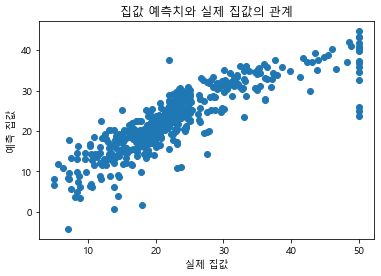

In [85]:
pred = model_boston.predict(boston.data)
plt.scatter(boston.target, pred)
plt.xlabel("실제 집값")
plt.ylabel("예측 집값")
plt.title("집값 예측치와 실제 집값의 관계")

In [88]:
df = pd.DataFrame(boston.data, columns=[boston.feature_names])
df.head(10)

df["MEDV"]=boston.target
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


C:\Users\Master\anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


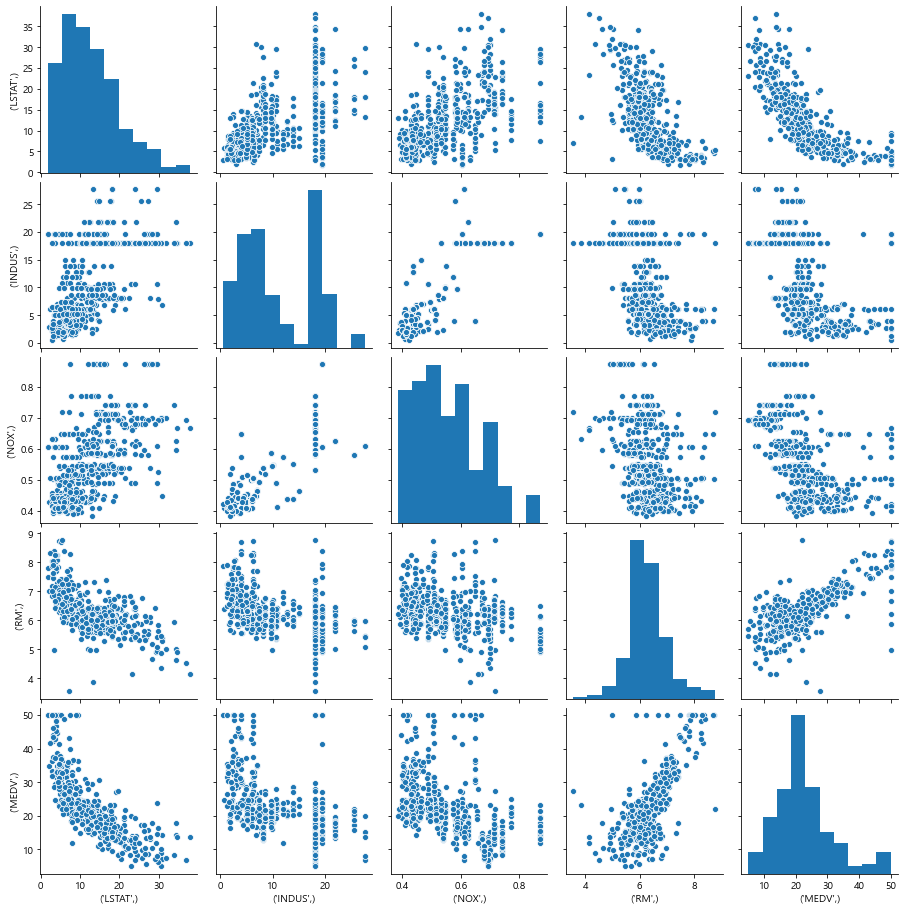

In [89]:
# seaborn의 pairplot
cols=["LSTAT","INDUS","NOX","RM","MEDV"]
sns.pairplot(df[cols], size=2.5)

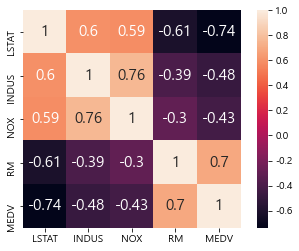

In [101]:
#seaborn의 heatmap

cc = np.corrcoef(df[cols].values.T)
cc
sns.heatmap(cc, yticklabels=cols, xticklabels=cols, annot= True, square=True, annot_kws={"size":15})

In [162]:
# 방이 5개일때 집값은 몇달러인가?
X=df[["RM"]].values
y=df[["MEDV"]].values

lr=lr = LinearRegression() .fit(X, y)
print(lr.coef_, lr.intercept_)

house_price=lr.predict([[5]])
house_price
print("방이 [%d]인 주택가격은 약 [%.f]달러이다."%(5,house_price*1000))


[[9.10210898]] [-34.67062078]
방이 [5]dls 주택가격은 약 [10840]달러이다.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A1EE57BD90>,
      dtype=object)

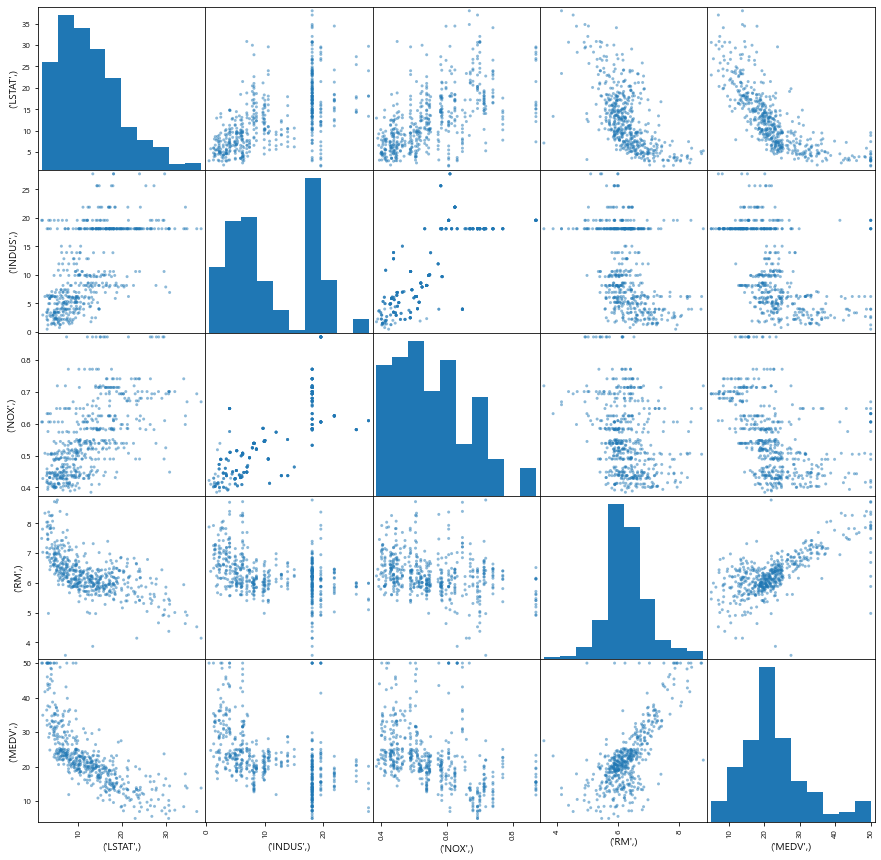

In [165]:
#pd.plotting.scatter_matrix(df[cols],figsize=(15,15))

---
## 로지스틱 선형회귀 

+ 논리값(참, 거짓) 으로
+ y = w1x1+w2x2+....+b > 0 
+ 직선을 곡선형태로 (시그모이드 함수라고도 한다.)
+ L2 norm 규제를 사용
+ C 파라미터를 사용해서 규제의 강도를 설정

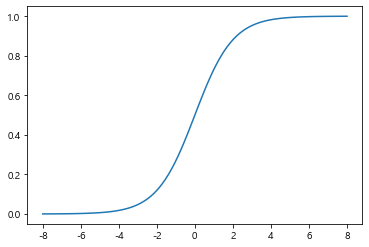

In [171]:
# sigmoid 함수 그래프 그리기 

def sigmoid(x):
    result=[]
    for i in x :
        result.append(1/(1+np.exp(-i))) # 1/(1+np.exp(-i)) 시그모이드 공식
    return result

x = np.linspace(-8, 8, 100)
sig = sigmoid(x)
#sig
plt.plot(x, sig)

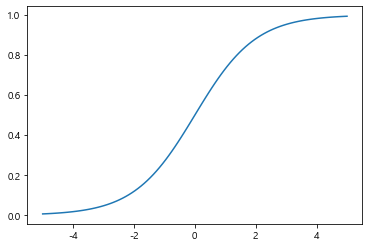

In [172]:
x=np.linspace(-5,5, 100)
plt.plot(x, 1/(1+np.exp(-x)))

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

C:\Users\Master\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
C:\Users\Master\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


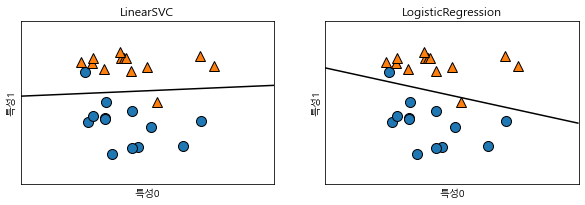

In [14]:
X, y = mglearn.datasets.make_forge() 
_, axes = plt.subplots(1, 2, figsize=(10,3))

for model, ax in zip([LinearSVC(C=1), LogisticRegression(C=1)], axes): 
#C=1 기본값/하이퍼파라미터 / 선형회귀에 알파와 같은 역할 /기본적으로 L2norm을 사용
    clf = model.fit(X,y)    
    mglearn.plots.plot_2d_separator(clf, X, ax=ax)
    
# 첫번째 반복돌때는 LInearSVC로 훈련한 결과 / 두번째 반복돌때는 로지스틱으로 훈련한 결과   

    mglearn.discrete_scatter(X[:,0], X[:,1],y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("특성0")
    ax.set_ylabel("특성1")
     

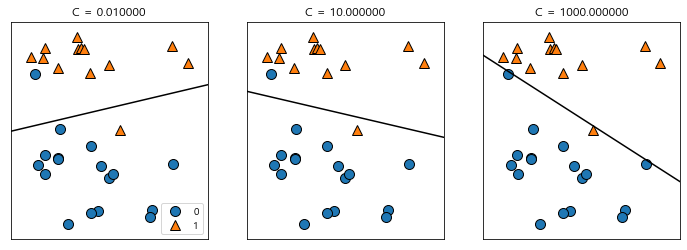

In [16]:
# C 값에 따라 규제가 어떻게 변화하는지
mglearn.plots.plot_linear_svc_regularization()

#C값이 커질수록 규제가 약해진다. -> 모델이 복잡해진다. /  알파와는 반대

In [17]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=42) 

In [23]:
logreg = LogisticRegression(C=1, penalty= "l2", max_iter=10000).fit(X_train, y_train) # 기본값 C=1, penalty="l2"
print("훈련 점수:", logreg.score(X_train, y_train))
print("테스트 점수:", logreg.score(X_test, y_test))
#테스트가 더 좋을때는 과소적합을 의심해 봐야 한다.

훈련 점수: 0.960093896713615
테스트 점수: 0.965034965034965


In [24]:
logreg100 = LogisticRegression(C=100, penalty= "l2", max_iter=10000).fit(X_train, y_train) # 기본값 C=1, penalty="l2"
print("훈련 점수:", logreg100.score(X_train, y_train))
print("테스트 점수:", logreg100.score(X_test, y_test))
# C 값이 커지면 규제가 약해져 복잡도가 커진다.

훈련 점수: 0.9765258215962441
테스트 점수: 0.965034965034965


In [25]:
logreg001 = LogisticRegression(C=0.01, penalty= "l2", max_iter=10000).fit(X_train, y_train) # 기본값 C=1, penalty="l2"
print("훈련 점수:", logreg001.score(X_train, y_train))
print("테스트 점수:", logreg001.score(X_test, y_test))
# C 값이 작아지면 규제가 커져 과소적합이 더 커진다.

훈련 점수: 0.9460093896713615
테스트 점수: 0.972027972027972


In [36]:
#‘newton-cg’, ‘lbfgs’, ‘sag’ and ‘saga’ handle L2 or no penalty
#‘liblinear’ and ‘saga’ also handle L1 penalty

logreg_l1= LogisticRegression(C=1, penalty= "l1", max_iter=10000, solver="liblinear").fit(X_train, y_train) # 기본값 C=1, penalty="l2"
print("훈련 점수:", logreg_l1.score(X_train, y_train))
print("테스트 점수:", logreg_l1.score(X_test, y_test))

훈련 점수: 0.960093896713615
테스트 점수: 0.958041958041958


In [37]:
logreg100_l1= LogisticRegression(C=100, penalty= "l1", max_iter=10000, solver="liblinear").fit(X_train, y_train) # 기본값 C=1, penalty="l2"
print("훈련 점수:", logreg100_l1.score(X_train, y_train))
print("테스트 점수:", logreg100_l1.score(X_test, y_test))

훈련 점수: 0.9882629107981221
테스트 점수: 0.972027972027972


In [38]:
logreg001_l1= LogisticRegression(C=0.01, penalty= "l1", max_iter=10000, solver="liblinear").fit(X_train, y_train) # 기본값 C=1, penalty="l2"
print("훈련 점수:", logreg001_l1.score(X_train, y_train))
print("테스트 점수:", logreg001_l1.score(X_test, y_test))

훈련 점수: 0.9107981220657277
테스트 점수: 0.951048951048951


#### KNN, LogisticRegression, LinearSVC의 성능 비교

In [46]:
dir(cancer)
cancer.data.shape
cancer.feature_names #malignant(악성), benign(양성)
cancer.target_names
np.bincount(cancer.target)   #cancer.target[cancer.target==0].shape


array([212, 357], dtype=int64)

In [141]:
# LogisticRegression
# 랜덤하게 뽑는 것을 다르게 뽑아서 테스트를 할 수 있게 


X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0) 
    
model = LogisticRegression(max_iter=10000).fit(X_train, y_train)
scores = model.score(X_test, y_test)

In [142]:
print("scores =", scores)

scores = 0.951048951048951


In [145]:
# LinearSVC (굉장히 예민하기  때문에 튜닝값에 따라 등락폭이 크다.)
scores=[]

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0) 

for i in range(10):
    model = LinearSVC(max_iter=10000).fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

C:\Users\Master\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Master\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Master\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Master\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Master\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of itera

In [146]:
print("scores =", scores)
print("----------------------------")
print("평균: ", np.mean(np.array(scores)))

scores = [0.8531468531468531, 0.7692307692307693, 0.9370629370629371, 0.9370629370629371, 0.9370629370629371, 0.9370629370629371, 0.9370629370629371, 0.951048951048951, 0.9370629370629371, 0.9300699300699301]
----------------------------
평균:  0.9125874125874127


In [143]:
#KNN
from sklearn.neighbors import KNeighborsClassifier


X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,random_state=0) 

model = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
scores = model.score(X_test, y_test)

In [144]:
print("scores =", scores)

# 이것저것 다 돌려보고 가장 성능이 좋은 것을 선택해야한다.

scores = 0.9370629370629371


([<matplotlib.axis.XTick at 0x2e75ed92160>,
 [Text(0, 0, 'mean radius'),
  Text(0, 0, 'mean texture'),
  Text(0, 0, 'mean perimeter'),
  Text(0, 0, 'mean area'),
  Text(0, 0, 'mean smoothness'),
  Text(0, 0, 'mean compactness'),
  Text(0, 0, 'mean concavity'),
  Text(0, 0, 'mean concave points'),
  Text(0, 0, 'mean symmetry'),
  Text(0, 0, 'mean fractal dimension'),
  Text(0, 0, 'radius error'),
  Text(0, 0, 'texture error'),
  Text(0, 0, 'perimeter error'),
  Text(0, 0, 'area error'),
  Text(0, 0, 'smoothness error'),
  Text(0, 0, 'compactness error'),
  Text(0, 0, 'concavity error'),
  Text(0, 0, 'concave points error'),
  Text(0, 0, 'symmetry error'),
  Text(0, 0, 'fractal dimension error'),
  Text(0, 0, 'worst radius'),
  Text(0, 0, 'worst texture'),
  Text(0, 0, 'worst perimeter'),
  Text(0, 0, 'worst area'),
  Text(0, 0, 'worst smoothness'),
  Text(0, 0, 'worst compactness'),
  Text(0, 0, 'worst concavity'),
  Text(0, 0, 'worst concave points'),
  Text(0, 0, 'worst symmetry'),
  

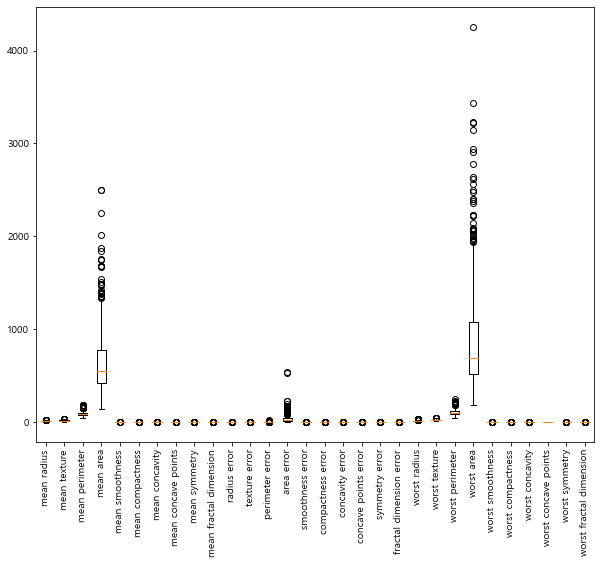

In [150]:
# 이상치 검출을 위한 BOXPLOT
plt.figure(figsize=(10, 8))
plt.boxplot(cancer.data)
#4번째, 24번째 컬럼은 이상치가 두드러지게 나타난다. 
plt.xticks(np.arange(30)+1, cancer.feature_names, rotation=90)

#이상치에 문제가 있다.

In [151]:
# 이상치 제거를 위한 표준화(standardization)
#현재 입력값의 평균값을 뺀것을 표준편차로 나눠준 것

# 속성별 평균
m = cancer.data.mean(axis=0)

# 속성별 표준편차 
s = cancer.data.std(axis=0)

data1 = (cancer.data- m) / s 

([<matplotlib.axis.XTick at 0x2e75fa64160>,
 [Text(0, 0, 'mean radius'),
  Text(0, 0, 'mean texture'),
  Text(0, 0, 'mean perimeter'),
  Text(0, 0, 'mean area'),
  Text(0, 0, 'mean smoothness'),
  Text(0, 0, 'mean compactness'),
  Text(0, 0, 'mean concavity'),
  Text(0, 0, 'mean concave points'),
  Text(0, 0, 'mean symmetry'),
  Text(0, 0, 'mean fractal dimension'),
  Text(0, 0, 'radius error'),
  Text(0, 0, 'texture error'),
  Text(0, 0, 'perimeter error'),
  Text(0, 0, 'area error'),
  Text(0, 0, 'smoothness error'),
  Text(0, 0, 'compactness error'),
  Text(0, 0, 'concavity error'),
  Text(0, 0, 'concave points error'),
  Text(0, 0, 'symmetry error'),
  Text(0, 0, 'fractal dimension error'),
  Text(0, 0, 'worst radius'),
  Text(0, 0, 'worst texture'),
  Text(0, 0, 'worst perimeter'),
  Text(0, 0, 'worst area'),
  Text(0, 0, 'worst smoothness'),
  Text(0, 0, 'worst compactness'),
  Text(0, 0, 'worst concavity'),
  Text(0, 0, 'worst concave points'),
  Text(0, 0, 'worst symmetry'),
  

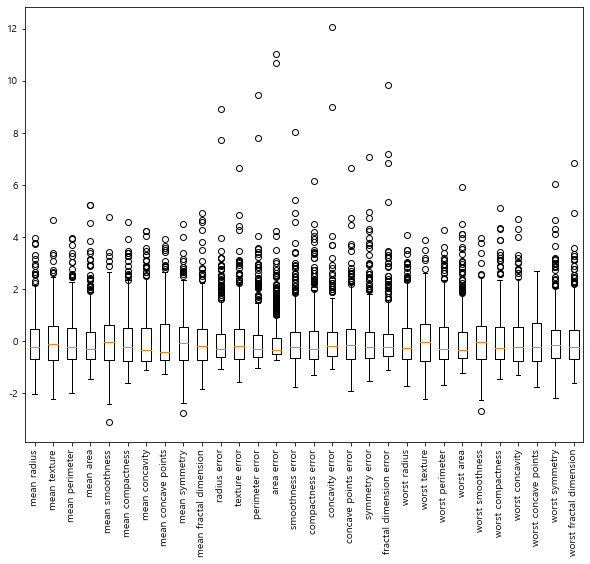

In [153]:
plt.figure(figsize=(10, 8))
plt.boxplot(data1)
#4번째, 24번째 컬럼은 이상치가 두드러지게 나타난다. 
plt.xticks(np.arange(30)+1, cancer.feature_names, rotation=90)

In [154]:
# LogisticRegression 에 표준화 적용
# 95% 이상에서 1~2% 올리는 것은 매우 힘들다.

X_train, X_test, y_train, y_test = train_test_split(data1, cancer.target, random_state=0) 
    
model = LogisticRegression(max_iter=10000).fit(X_train, y_train)
scores = model.score(X_test, y_test)

In [155]:
print("scores =", scores)

scores = 0.965034965034965


In [162]:
# LinearSVC에 표준화 적용 (굉장히 예민하기  때문에 튜닝값에 따라 등락폭이 크다.)
scores=[]

X_train, X_test, y_train, y_test = train_test_split(data1, cancer.target, random_state=0) 

for i in range(10):
    model = LinearSVC(max_iter=10000).fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

In [163]:
print("scores =", scores)
print("----------------------------")
print("평균: ", np.mean(np.array(scores)))

scores = [0.9440559440559441, 0.9440559440559441, 0.9440559440559441, 0.9440559440559441, 0.9440559440559441, 0.9440559440559441, 0.9440559440559441, 0.9440559440559441, 0.9440559440559441, 0.9440559440559441]
----------------------------
평균:  0.944055944055944


In [160]:
#KNN에 표준화 적용
from sklearn.neighbors import KNeighborsClassifier


X_train, X_test, y_train, y_test = train_test_split(data1, cancer.target,random_state=0) 

model = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
scores = model.score(X_test, y_test)

In [161]:
print("scores =", scores)

#처음부터 파라미터를 조정하지 않고 데이터마이닝과 전처리를 충분히 한 후에 파라미터를 조정해야한다.

scores = 0.951048951048951


In [170]:
# LogisticRegression 에 표준화 적용
# C값 조정

X_train, X_test, y_train, y_test = train_test_split(data1, cancer.target, random_state=0) 
    
model = LogisticRegression(C=1, max_iter=10000).fit(X_train, y_train)
scores = model.score(X_test, y_test)

print("scores =", scores)

scores = 0.965034965034965


In [175]:
scores=[]

X_train, X_test, y_train, y_test = train_test_split(data1, cancer.target, random_state=0) 

for i in range(10):
    model = LinearSVC(C=0.01, max_iter=10000).fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
    
print("scores =", scores)
print("----------------------------")
print("평균: ", np.mean(np.array(scores)))

scores = [0.972027972027972, 0.972027972027972, 0.972027972027972, 0.972027972027972, 0.972027972027972, 0.972027972027972, 0.972027972027972, 0.972027972027972, 0.972027972027972, 0.972027972027972]
----------------------------
평균:  0.972027972027972


In [ ]:
# 튜닝까지 해본결과 LinearSVC를 쓰는것이 성능이 제일 좋아보인다.

In [191]:
# 전처리 하기전 80~90초반을 왔다갔다 한 것이 최대 99%까지 올라갔다는 것은 분명히 좋아졌다는 것을 의미한다.
scores=[]

X_train, X_test, y_train, y_test = train_test_split(data1, cancer.target) 

for i in range(10):
    model = LinearSVC(C=0.01, max_iter=10000).fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
    
print("scores =", scores)
print("----------------------------")
print("평균: ", np.mean(np.array(scores)))

scores = [0.993006993006993, 0.993006993006993, 0.993006993006993, 0.993006993006993, 0.993006993006993, 0.993006993006993, 0.993006993006993, 0.993006993006993, 0.993006993006993, 0.993006993006993]
----------------------------
평균:  0.993006993006993


---
### 다중 클래스 분류

+ LogisticRegression : 소프트 맥스
+ 다른 알고리즘은 이중분류를 여러개를 사용해서 다중클래스를 분류해야한다.


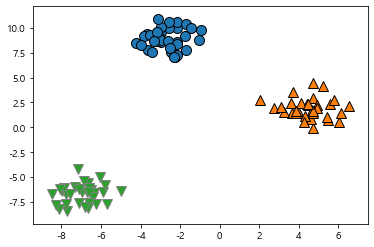

In [193]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0],X[:,1], y)

In [206]:
linear_svc=LinearSVC().fit(X, y) #훈련
print(linear_svc.coef_.shape) #회귀계수
print(linear_svc.intercept_.shape) #절편
print(linear_svc.coef_)
print(linear_svc.coef_[0])
print(linear_svc.coef_[1])
#이진분류기를 3개써야 한다. 

(3, 2)
(3,)
[[-0.17492623  0.23140106]
 [ 0.47621079 -0.06936618]
 [-0.189144   -0.20399571]]
[-0.17492623  0.23140106]
[ 0.47621079 -0.06936618]


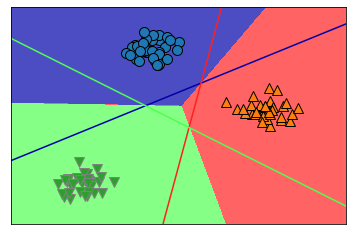

In [205]:
# 훈련받은 경계선 그리기
mglearn.plots.plot_2d_classification(linear_svc, X, fill=True, alpha= .7)
mglearn.discrete_scatter(X[:,0],X[:,1], y) 
line = np.linspace(-15, 15)

for coef, intercept, color in zip(linear_svc.coef_, linear_svc.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line*coef[0] + intercept)/coef[1], c=color)

--- 
### 적합도 검정(성능 측정) P.131
- Accuracy : 정확도 (전체 데이터 중에서 맞은 개수) 
- 데이터가 골고루 분포되어있으면 정확도만해도 가능하지만 일방적으로 한쪽으로 치우쳐져 있는 데이터는 정확도 만으로 적합도검정을 해서는 안된다.
- TN + TP / 전체 데이터 갯수(TN + TP + FN + FP) -> score()

---- 
- 클래스의 갯수가 다르다면?

- Precision : 정밀도 (실제 예측한 양성 값들 중에서 실제값이 양성과 같은 데이터의 비율)  
- Positive (양성) / Negative(음성) -> 대부분의 분류 알고리즘은 이진분류이기 때문에 양성과 음성으로 나뉜다.(일반적인 의미가 아닌 어떤 것을 관점으로 분류를 하려고하는가에 따라 나뉜다)
- TP / FP + TP


- Recall : 재현율 (실제 값이 양성인 것들 중에서 예측과 실제값이 양성으로 일치한 비율) 
- TP / TP + FN
- 정밀도를 높이면 재현율이 낮아지고 재현율을 높이면 정밀도가 낮아지므로 적절한 타협점을 찾아야 한다. 
- 재현율을 더 중요하게 생각하는 경우가 많다. (무조건은 아님 / 스팸메일의 경우 정밀도가 중요)


- C.M p135


- F1 Score (정밀도와 재현율의 적절한 타협점)
    - 정밀도와 재현율의 조화 평균 p.136


- ROC 곡선 
- 곡선이 직선에서 멀면 멀수록 성능이 좋다 (왼쪽 모서리에 닿으면 닿을수록)
- AUC : 곡선아래의 면적(크면 클수록 성능이 좋다)


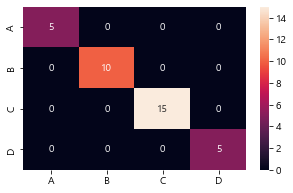

In [210]:
arr =  [[5, 0, 0, 0],
       [0, 10, 0, 0],
       [0, 0, 15, 0],
       [0, 0, 0, 5]]

df_cm = pd.DataFrame(arr, index= [i for i in "ABCD"], columns= [i for i in "ABCD"])
df_cm
plt.figure(figsize=(5,3))
sns.heatmap(df_cm, annot=True)

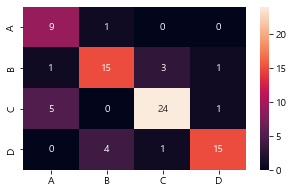

In [211]:
arr =  [[9, 1, 0, 0],
       [1, 15, 3, 1],
       [5, 0, 24, 1],
       [0, 4, 1, 15]]

df_cm = pd.DataFrame(arr, index= [i for i in "ABCD"], columns= [i for i in "ABCD"])
df_cm
plt.figure(figsize=(5,3))
sns.heatmap(df_cm, annot=True)

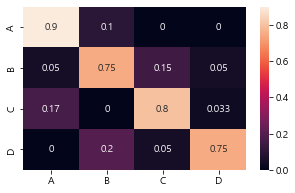

In [214]:
# 정규화를 하게 되면 훨씬 보기 편해진다.

total = np.sum(arr, axis=1)
total
arr = arr/total[:, None]
arr


df_cm = pd.DataFrame(arr, index= [i for i in "ABCD"], columns= [i for i in "ABCD"])
df_cm
plt.figure(figsize=(5,3))
sns.heatmap(df_cm, annot=True)

#정규화를 하면 A를 가장 잘 맞춘것으로 나타난다.

In [215]:
from sklearn.metrics import confusion_matrix

In [216]:
y_ture = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]

confusion_matrix(y_ture, y_pred)

# 대각선은 TP / 행은 실제값이 0일때 1일때 2일때 /열은 예측값이 0일때 1일때 2일때 

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]], dtype=int64)

In [218]:
y_ture = [1, 0, 1, 1, 0, 1]
y_pred = [0, 0, 1, 1, 0, 1]

# 1부터 먼저 시작 할 수 있게 (음성과 양성을 바꿀)
confusion_matrix(y_ture, y_pred, labels=[1,0]) 


array([[3, 1],
       [0, 2]], dtype=int64)

In [228]:
# 오차표에 대한 보고서를 따로 만들 수 있다.
from sklearn.metrics import classification_report

y_ture = [1, 0, 1, 1, 0, 1]
y_pred = [0, 0, 1, 1, 0, 1]

print(classification_report(y_ture, y_pred, target_names=["class 0", "class 1"]))

              precision    recall  f1-score   support

     class 0       0.67      1.00      0.80         2
     class 1       1.00      0.75      0.86         4

    accuracy                           0.83         6
   macro avg       0.83      0.88      0.83         6
weighted avg       0.89      0.83      0.84         6



#### ROC curve(with AUC)


- 이진 분류에서 사용
- 다중 분류에서는 사용 불가

In [3]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [7]:
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=0)
X[:10, :] 
y[:10]

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 0])

In [8]:
# 훈련용과 테스트용을 나누는 것은 생략 

model = LogisticRegression().fit(X, y)


In [9]:
y_hat = model.predict(X)

In [10]:
print(y_hat[:40])
print(y[:40])

[0 1 1 1 1 1 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 1 0 1 1 1 1 0 1
 0 0 1]
[0 1 1 1 1 1 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 0 1
 0 0 1]


In [11]:
confusion_matrix(y, y_hat)

array([[477,  20],
       [ 28, 475]], dtype=int64)

In [14]:
print(classification_report(y, y_hat, target_names=["class 0","class 1"]))

              precision    recall  f1-score   support

     class 0       0.94      0.96      0.95       497
     class 1       0.96      0.94      0.95       503

    accuracy                           0.95      1000
   macro avg       0.95      0.95      0.95      1000
weighted avg       0.95      0.95      0.95      1000



In [16]:
from sklearn.metrics import roc_curve

Text(0, 0.5, 'True Positive Rate(recall)')

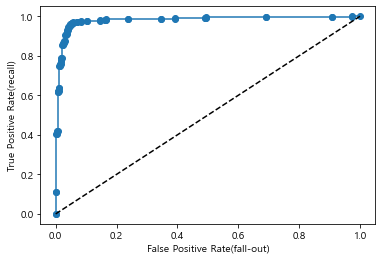

In [25]:
fpr, tpr, thresholds = roc_curve(y, model.decision_function(X)) # X 에는 원래 테스트용 데이터가 들어감 

plt.plot(fpr, tpr, "o-", label= "Logistic Regression")
plt.plot([0,1],[0, 1], "k--", label="Random Guess")
plt.xlabel("False Positive Rate(fall-out)")
plt.ylabel("True Positive Rate(recall)")



In [31]:
# AUC (면적의 값) 0.5~1 사이 (0.5 밑으로는 내려가지 않는다.)
from sklearn.metrics import roc_auc_score

roc_auc_score(y, model.decision_function(X))

0.9795592641335089

---
### 사례1 : 타이타닉 예제

- 새로운 인적사항의 사람을 넣었을 때 살 수 있을까 없을까?
- 성능을 제대로 측정했는지에 대한 관점

In [32]:
df = pd.read_csv("data/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [33]:
# 전처리가 필요없는 컬럼들 모아놓기 
cols_to_keep =["Survived", "Age", "Fare"]



In [34]:
# Pclass 는 숫자의 크기가 생겨버리기 때문에 더미화 시켜야 한다.(우열없이) -> 원 핫 인코딩 / 머신러닝에서는 중요하다.
# Pclass의 더미 변수화(One Hot encoding)

dummy_class = pd.get_dummies(df["Pclass"], prefix="Pclass")
dummy_class.head()

,Pclass_1,Pclass_2,Pclass_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [35]:
# 성별(sex)의 더미 변수화
dummy_sex = pd.get_dummies(df["Sex"], prefix="Sex")
dummy_sex.head()

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [37]:
df1 = df[cols_to_keep].join(dummy_class.loc[:,"Pclass1":])
df1.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,7.2500,0,0,1
1,1,38.0,71.2833,1,0,0
2,1,26.0,7.9250,0,0,1
3,1,35.0,53.1000,1,0,0
4,0,35.0,8.0500,0,0,1


In [39]:
df1 = df1.join(dummy_sex.loc[:,"Sex_male"])
df1.head()

#머신러닝을 돌리기위한 기본 자료
#survived = y / 나머지는 X 

ValueError: columns overlap but no suffix specified: Index(['Sex_male'], dtype='object')

In [42]:
#Survived를 제외한 나머지 컬럼(특성) 추출
train_cols = df1.columns[1:]
train_cols

Index(['Age', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_male'], dtype='object')

In [45]:
# 결측치 확인
np.isnan(df1[train_cols])
df1.isnull().sum()

# 만약에 삭제를 할 경우에는
# df1[train_cols] = df1[train_cols].dropna(axis=0)
# df1["Survived"] = df1["Survived"].dropna(axis=0)

# 0으로 대체
df1[train_cols] = df1[train_cols].fillna(0)
df1["Survived"] = df1["Survived"].fillna(0)

In [47]:
import statsmodels.api as sm 
# 통계적인 정보들을 확인하기 위핸 패키지

In [48]:
model = sm.Logit(df1["Survived"], df1[train_cols]).fit() # 로지스틱 회귀분석을 돌리는 함수
model.summary2()

#Coef 기울기  / 남성일수록 많이 죽는다

Optimization terminated successfully.
         Current function value: 0.458488
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.311     
Dependent Variable: Survived         AIC:              829.0250  
Date:               2021-01-12 11:44 BIC:              857.7791  
No. Observations:   891              Log-Likelihood:   -408.51   
Df Model:           5                LL-Null:          -593.33   
Df Residuals:       885              LLR p-value:      1.0371e-77
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
Age          -0.0159    0.0053   -2.9843  0.0028  -0.0264  -0.0055
Fare          0.0015    0.0021    0.7370  0.4611  -0.0026   0.0056
Pclass_1      2.6932    0.3372    7.9875  0.0000   2.0323   3.3540
Pclass_2      1.8519    0.2670    6.9358  0.0000   1.3286   2.3752
Pclass_3      0.6215    0.1808    3.4377  0.0006   0.2672   0.9758
Sex_male     -2.6151    0.1860  -14.0594  0.0000  -2.9797  -2.2505
=================================================================

"""

In [49]:
# 머신러닝
model2 = LogisticRegression().fit(df1[train_cols], df1["Survived"])

In [51]:
df1["predict"] = model2.predict(df1[train_cols]) #실제로는 테스트 데이터가 들어가야함
df1.head(40)
#Survived 와 predict를 비교

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_male,predict
0,0,22.0,7.2500,0,0,1,1,0
1,1,38.0,71.2833,1,0,0,0,1
2,1,26.0,7.9250,0,0,1,0,1
3,1,35.0,53.1000,1,0,0,0,1
4,0,35.0,8.0500,0,0,1,1,0
5,0,0.0,8.4583,0,0,1,1,0
6,0,54.0,51.8625,1,0,0,1,0
7,0,2.0,21.0750,0,0,1,1,0
8,1,27.0,11.1333,0,0,1,0,1
9,1,14.0,30.0708,0,1,0,0,1


In [53]:
# 산 사람과 죽은사람이 50:50이 아니기 때문에 정확도만으로 측정해서는 안된다. 
confusion_matrix(df1["Survived"], df1["predict"], labels=[1,0]) # 산 사람이 더 중요할 경우 labels를 [1, 0]으로

array([[242, 100],
       [ 93, 456]], dtype=int64)

In [56]:
# 일단 정확도를 확인 
print("정확도 :", model2.score(df1[train_cols],df1["Survived"]))
print("정확도 :", (242 + 456) / (242 + 100 + 93 + 456))

정확도 : 0.7833894500561167
정확도 : 0.7833894500561167


In [57]:
print(classification_report(df1["Survived"], df1["predict"]))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83       549
           1       0.72      0.71      0.71       342

    accuracy                           0.78       891
   macro avg       0.77      0.77      0.77       891
weighted avg       0.78      0.78      0.78       891



Text(0, 0.5, 'True Positive Rate(recall)')

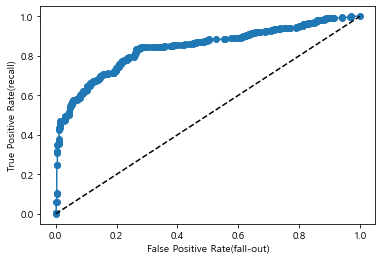

In [61]:
fpr, tpr, thresholds = roc_curve(df1["Survived"], model2.decision_function(df1[train_cols])) # X 에는 원래 테스트용 데이터가 들어감 

plt.plot(fpr, tpr, "o-", label= "Logistic Regression")
plt.plot([0,1],[0, 1], "k--", label="Random Guess")
plt.xlabel("False Positive Rate(fall-out)")
plt.ylabel("True Positive Rate(recall)")



In [63]:
roc_auc_score(df1["Survived"], model2.decision_function(df1[train_cols]))

0.8414235345497928